In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# --- Block 1: Tạo dữ liệu cho cột 'Miles_Per_week' ---
mean1 = 55         # Giá trị mean1 được cập nhật theo yêu cầu
std_dev1 = 10
num_samples = 500

# Tạo số ngẫu nhiên theo phân phối chuẩn
column1_numbers = np.random.normal(mean1, std_dev1, num_samples)
# Giới hạn giá trị trong khoảng [30, 120]
column1_numbers = np.clip(column1_numbers, 30, 120)
# Làm tròn thành số nguyên gần nhất và chuyển kiểu dữ liệu thành int
column1_numbers = np.round(column1_numbers).astype(int)

# --- Block 2: Tạo dữ liệu cho cột 'Farthest_run' ---
mean2 = 18
std_dev2 = 3

# Tạo số ngẫu nhiên theo phân phối chuẩn
column2_numbers = np.random.normal(mean2, std_dev2, num_samples)
# Giới hạn giá trị trong khoảng [12, 26]
column2_numbers = np.clip(column2_numbers, 12, 26)
# Làm tròn thành số nguyên gần nhất và chuyển kiểu dữ liệu thành int
column2_numbers = np.round(column2_numbers).astype(int)

# --- Block 3: Tạo dữ liệu cho cột 'Qualified_Boston_Marathon' ---
# Tạo mảng gồm các số nguyên ngẫu nhiên 0 hoặc 1
column3_numbers = np.random.randint(2, size=num_samples)
# Sử dụng boolean indexing:
# Nếu giá trị trong column1_numbers > mean1 (55), thì đặt giá trị tương ứng trong column3_numbers thành 1
column3_numbers[column1_numbers > mean1] = 1

# --- Block 4: Tạo dictionary chứa dữ liệu ---
data = {'Miles_Per_week': column1_numbers,
        'Farthest_run': column2_numbers,
        'Qualified_Boston_Marathon': column3_numbers}

# --- (Tùy chọn) Chuyển dictionary thành Pandas DataFrame ---
df = pd.DataFrame(data)

In [4]:
df = pd.DataFrame(data)

In [5]:
df

,Miles_Per_week,Farthest_run,Qualified_Boston_Marathon
0,53,16,0
1,56,21,1
2,48,16,1
3,53,20,0
4,48,14,1
...,...,...,...
495,55,17,1
496,66,21,1
497,57,18,1
498,59,18,1


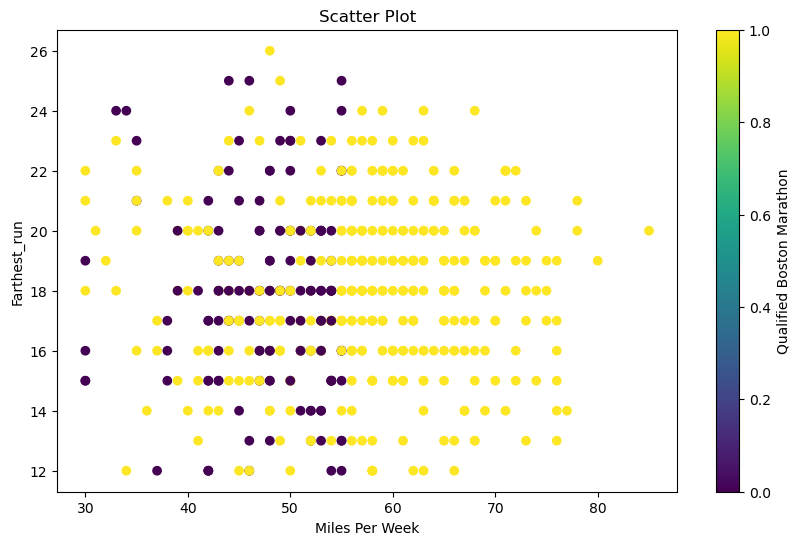

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df['Miles_Per_week'], 
    df['Farthest_run'], 
    c=df['Qualified_Boston_Marathon'], 
    cmap='viridis'
)
plt.xlabel('Miles Per Week')
plt.ylabel('Farthest_run')
plt.title('Scatter Plot')
plt.colorbar(label='Qualified Boston Marathon')
plt.show()

In [7]:
X = df.iloc[:, 0:2]

In [8]:
X

,Miles_Per_week,Farthest_run
0,53,16
1,56,21
2,48,16
3,53,20
4,48,14
...,...,...
495,55,17
496,66,21
497,57,18
498,59,18


In [9]:
y = df.iloc[:, 2]

In [10]:
y

0      0
1      1
2      1
3      0
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Qualified_Boston_Marathon, Length: 500, dtype: int32

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size = 0.2)

In [13]:
from sklearn.svm import SVC

In [14]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [15]:
model.score(X_test, y_test)

0.71

In [16]:
#regularization
model_reg0 = SVC(C=0.1)
model_reg0.fit(X_train, y_train)

SVC(C=0.1)

In [17]:
model_reg0.score(X_test, y_test)

0.71

In [21]:
model_reg1 = SVC(C=1000)
model_reg1.fit(X_train, y_train)
model_reg1.score(X_test, y_test)


0.75

In [22]:
#gamma 
model_gamma0 = SVC(gamma=0.1)
model_gamma0.fit(X_train, y_train)
model_gamma0.score(X_test, y_test)

0.78

In [26]:
model_gamma1 = SVC(gamma=1)
model_gamma1.fit(X_train, y_train)
model_gamma1.score(X_test, y_test)

0.71

In [27]:
model_gamma2 = SVC(gamma=1000)
model_gamma2.fit(X_train, y_train)
model_gamma2.score(X_test, y_test)

0.69

In [28]:
#kernel
model_linear = SVC(kernel = 'linear')
model_linear.fit(X_train, y_train)
model_linear.score(X_test, y_test)

0.71

In [35]:
model_linear1 = SVC(kernel = 'rbf')
model_linear1.fit(X_train, y_train)
model_linear1.score(X_test, y_test)

0.71